In [1]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
default_edge_color = 'gray'
default_node_color = '#407cc9'
enhanced_node_color = '#f5b042'
enhanced_edge_color = '#cc2f04'


In [3]:
## we are drawing a simple graph
def draw_graph(G, node_names={}, filename=None, node_size=50):
    pos_nodes = nx.spring_layout(G)
    nx.draw(G, pos_nodes, with_labels=False, node_size=node_size, edge_color='gray')
    
    pos_attrs = {}
    for node, coords in pos_nodes.items():
        pos_attrs[node] = (coords[0], coords[1] + 0.08)
        
    nx.draw_networkx_labels(G, pos_attrs, labels=node_names, font_family='serif')
    
    plt.axis('off')
    axis = plt.gca()
    axis.set_xlim([1.2*x for x in axis.get_xlim()])
    axis.set_ylim([1.2*y for y in axis.get_ylim()])
    
    if filename:
        plt.savefig(filename, format="png")

In [4]:
#drawing enhances path

def draw_enhanced_path(G, path_to_enhance, node_names={}, filename=None):
    path_edges = list(zip(path,path[1:]))
    pos_nodes = nx.spring_layout(G)

    plt.figure(figsize=(5,5),dpi=300)
    pos_nodes = nx.spring_layout(G)
    nx.draw(G, pos_nodes, with_labels=False, node_size=50, edge_color='gray')
    
    pos_attrs = {}
    for node, coords in pos_nodes.items():
        pos_attrs[node] = (coords[0], coords[1] + 0.08)
        
    nx.draw_networkx_labels(G, pos_attrs, labels=node_names, font_family='serif')
    nx.draw_networkx_edges(G,pos_nodes,edgelist=path_edges, edge_color='#cc2f04', style='dashed', width=2.0)
    
    plt.axis('off')
    axis = plt.gca()
    axis.set_xlim([1.2*x for x in axis.get_xlim()])
    axis.set_ylim([1.2*y for y in axis.get_ylim()])
    
    if filename:
        plt.savefig(filename, format="png")

In [5]:
Gr = nx.Graph()
nodes = {1:'Dublin',2:'Paris',3:'Milan',4:'Rome',5:'Naples',6:'Moscow',7:'Tokyo'}
Gr.add_nodes_from(nodes.keys())
Gr.add_edges_from([(1,2),(1,3),(2,3),(3,4),(4,5),(5,6),(6,7),(7,5)])

In [6]:
path = nx.shortest_path(Gr,source=1,target=7)
print(path)


[1, 3, 4, 5, 7]


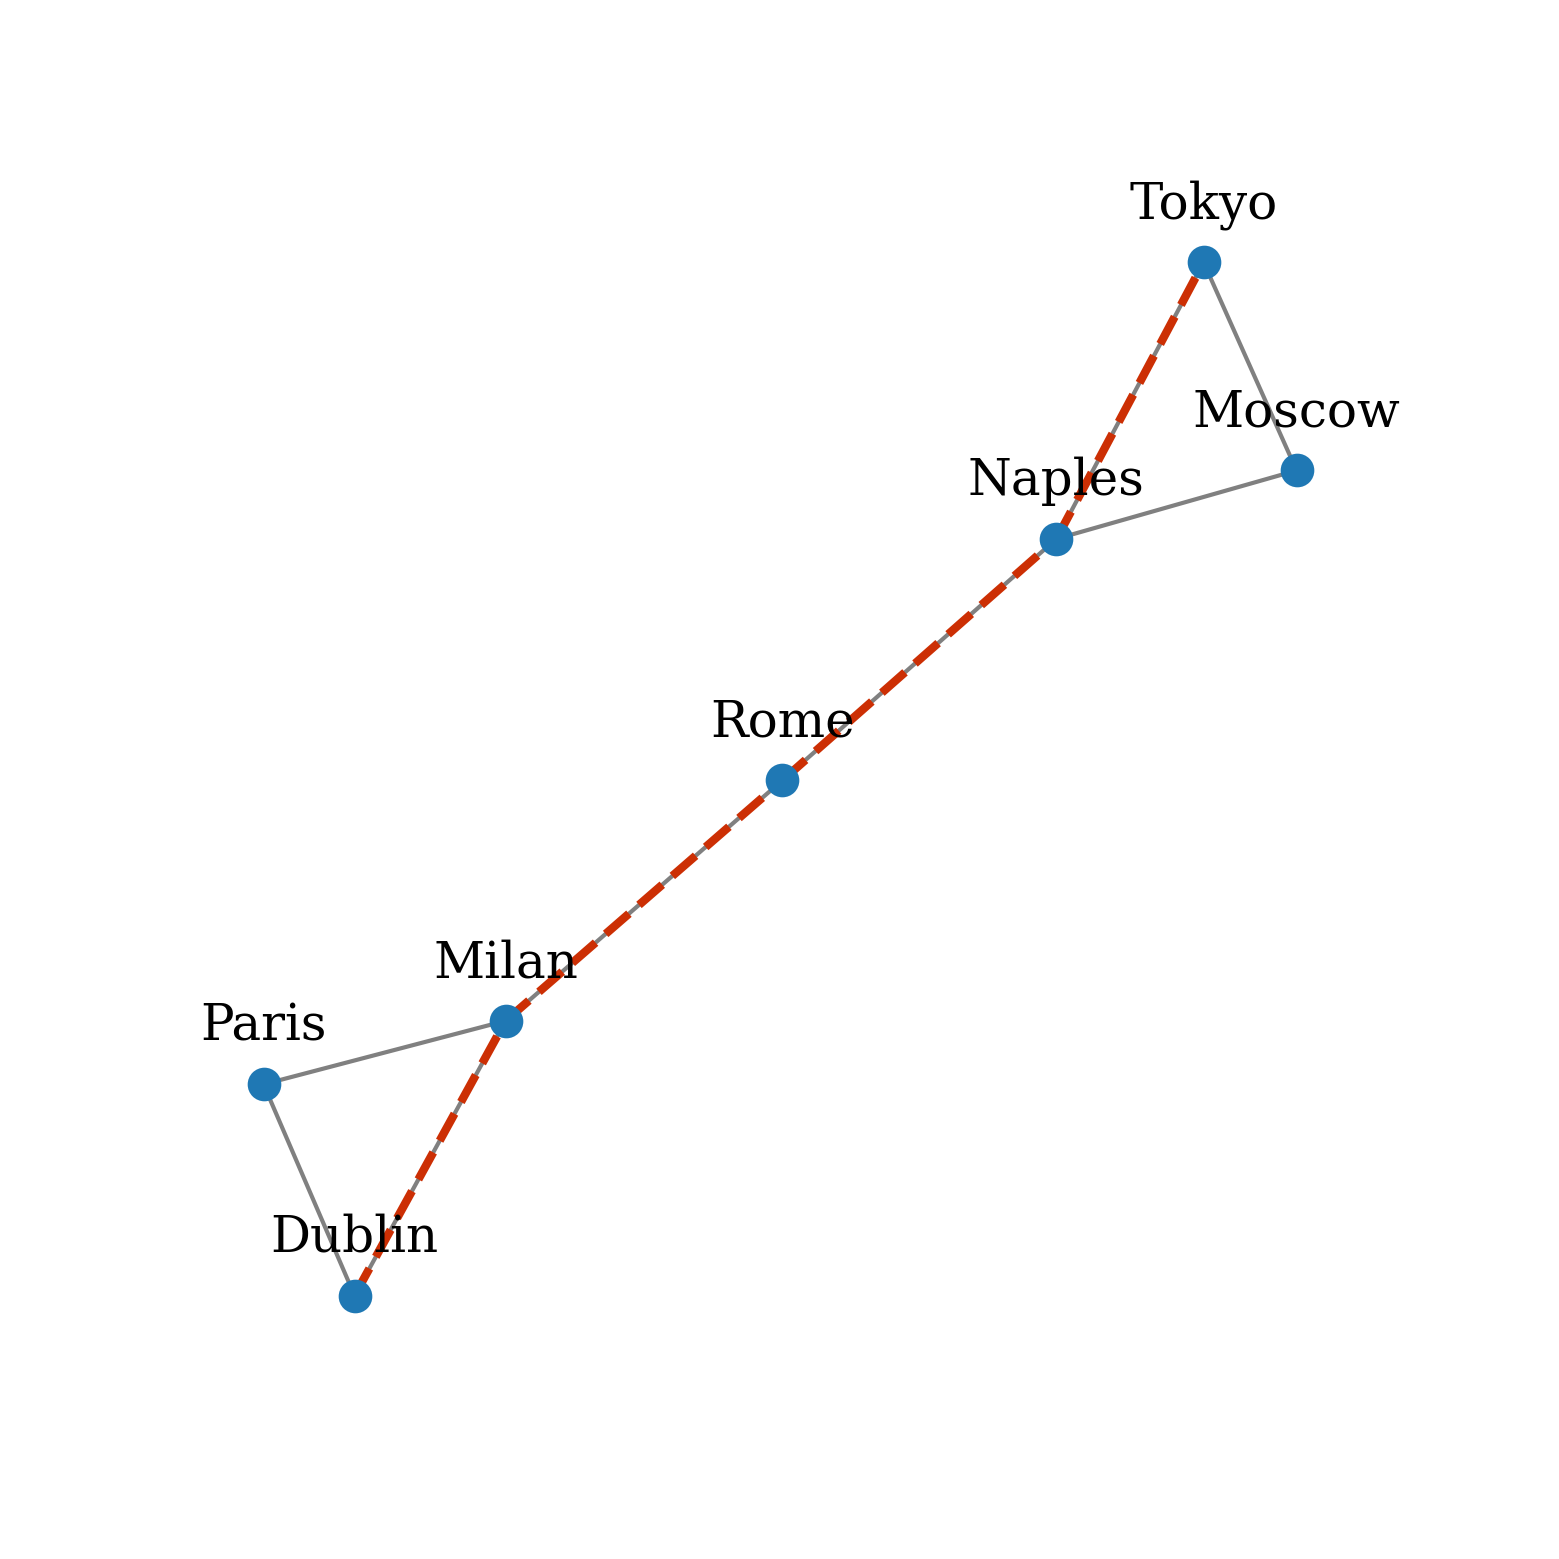

In [7]:
draw_enhanced_path(Gr, path, node_names=nodes,filename='shortest_path.png')


In [8]:
nx.average_shortest_path_length(Gr)

2.1904761904761907

In [9]:
print(nx.global_efficiency(Gr))
print(nx.local_efficiency(Gr))

0.611111111111111
0.6666666666666667


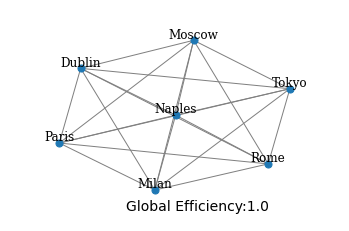

In [10]:
# higher efficiency
G = nx.complete_graph(n=7)
nodes = {0:'Dublin',1:'Paris',2:'Milan',3:'Rome',4:'Naples',5:'Moscow',6:'Tokyo'}

ge = round(nx.global_efficiency(G),2)

# place the text box in axes coords
ax = plt.gca()
ax.text(-.4, -1.3, "Global Efficiency:{}".format(ge), fontsize=14, ha='left', va='bottom');

draw_graph(G,node_names=nodes,filename='efficiency.png')

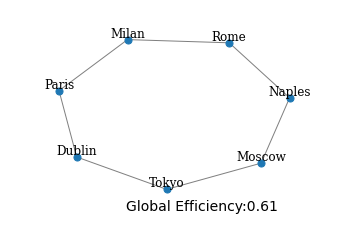

In [11]:
# lower efficiency
G = nx.cycle_graph(n=7)
nodes = {0:'Dublin',1:'Paris',2:'Milan',3:'Rome',4:'Naples',5:'Moscow',6:'Tokyo'}

le = round(nx.global_efficiency(G),2)

# place the text box in axes coords
ax = plt.gca()
ax.text(-.4, -1.3, "Global Efficiency:{}".format(le), fontsize=14, ha='left', va='bottom');

draw_graph(G, node_names=nodes,filename='less_efficiency.png')

In [12]:
G = nx.Graph()
nodes = {1:'Dublin',2:'Paris',3:'Milan',4:'Rome',5:'Naples',6:'Moscow',7:'Tokyo'}
G.add_nodes_from(nodes.keys())
G.add_edges_from([(1,2),(1,3),(2,3),(3,4),(4,5),(5,6),(6,7),(7,5)])

In [13]:
nx.average_clustering(G)

0.6666666666666667

In [14]:
nx.clustering(G)

{1: 1.0,
 2: 1.0,
 3: 0.3333333333333333,
 4: 0,
 5: 0.3333333333333333,
 6: 1.0,
 7: 1.0}

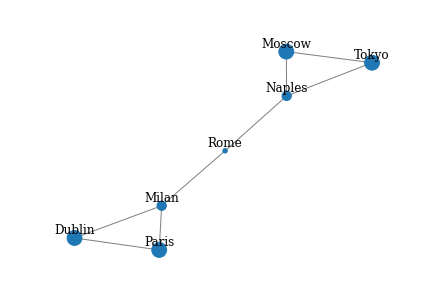

In [15]:
cc = nx.clustering(G)
node_size=[(v + 0.1) * 200 for v in cc.values()]
draw_graph(G, node_names=nodes, node_size=node_size,filename='clustering.png')

In [16]:
nx.degree_centrality(G)

{1: 0.3333333333333333,
 2: 0.3333333333333333,
 3: 0.5,
 4: 0.3333333333333333,
 5: 0.5,
 6: 0.3333333333333333,
 7: 0.3333333333333333}

,Dublin,Paris,Milan,Rome,Naples,Moscow,Tokyo
Degree centrality,0.333333,0.333333,0.5,0.333333,0.5,0.333333,0.333333


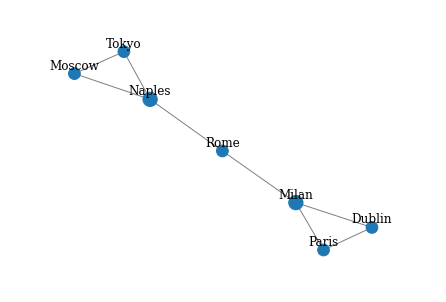

In [17]:
dc = nx.degree_centrality(G)
node_size=[(v + 0.01) * 400 for v in dc.values()]
draw_graph(G, node_names=nodes, node_size=node_size,filename='deg_centr.png')

df = pd.DataFrame(dc,index=['Degree centrality'])
df.columns = nodes.values()
df

In [18]:
import networkx.algorithms.community as nx_comm

G = nx.Graph()
nodes = {1:'Dublin',2:'Paris',3:'Milan',4:'Rome',5:'Naples',6:'Moscow',7:'Tokyo'}
G.add_nodes_from(nodes.keys())
G.add_edges_from([(1,2),(1,3),(2,3),(3,4),(4,5),(5,6),(6,7),(7,5)])

# partitions can be provided manually
print(nx_comm.modularity(G, communities=[{1,2,3,4},{5,6,7}]))

# or automatically computed using networkx
print(nx_comm.modularity(G, nx_comm.label_propagation_communities(G)))

0.3671875
0.3671875


In [19]:
nx.degree_pearson_correlation_coefficient(G)



-0.6000000000000001

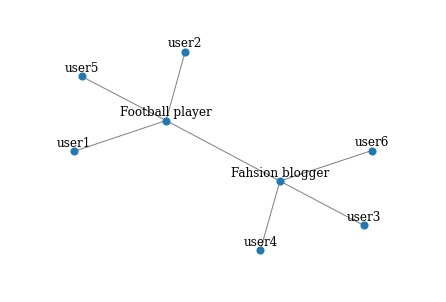

In [20]:
G = nx.Graph()
nodes = {1:'user1', 2:'user2', 3:'Football player', 4:'Fahsion blogger', 5:'user3', 6:'user4',
         7:'user5', 8:'user6'}
G.add_nodes_from(nodes.keys())
G.add_edges_from([(1,3),(2,3),(7,3),(3,4),(5,4),(6,4),(8,4)])

draw_graph(G, node_names=nodes,filename='assortativity.png')

In [21]:
default_edge_color = 'gray'
default_node_color = '#407cc9'
enhanced_node_color = '#f5b042'
enhanced_edge_color = '#cc2f04'


In [22]:
output_dir = "./figures/"


In [23]:
 def draw_graph(G, node_names={}, filename=None, node_size=50, layout = None):
    pos_nodes = nx.spring_layout(G) if layout is None else layout(G)
    nx.draw(G, pos_nodes, with_labels=False, node_size=node_size, edge_color='gray')
  
    pos_attrs = {}
    for node, coords in pos_nodes.items():
        pos_attrs[node] = (coords[0], coords[1] + 0.08)
  
    nx.draw_networkx_labels(G, pos_attrs, labels=node_names, font_family='serif')
  
    plt.axis('off')
    axis = plt.gca()
    axis.set_xlim([1.2*x for x in axis.get_xlim()])
    axis.set_ylim([1.2*y for y in axis.get_ylim()])
  
    if filename:
        plt.savefig(os.path.join(output_dir, filename), format="png")


# draw enhanced path on the graph
def draw_enhanced_path(G, path_to_enhance, node_names={}, filename=None, layout=None):
    path_edges = list(zip(path,path[1:]))
    pos_nodes = nx.spring_layout(G) if layout is None else layout(G)
    
    plt.figure(figsize=(5,5),dpi=300)
    pos_nodes = nx.spring_layout(G)
    nx.draw(G, pos_nodes, with_labels=False, node_size=50, edge_color='gray')
  
    pos_attrs = {}
    for node, coords in pos_nodes.items():
        pos_attrs[node] = (coords[0], coords[1] + 0.08)
  
    nx.draw_networkx_labels(G, pos_attrs, labels=node_names, font_family='serif')
    nx.draw_networkx_edges(G,pos_nodes,edgelist=path_edges, edge_color='#cc2f04', style='dashed', width=2.0)
  
    plt.axis('off')
    axis = plt.gca()
    axis.set_xlim([1.2*x for x in axis.get_xlim()])
    axis.set_ylim([1.2*y for y in axis.get_ylim()])
  
    if filename:
        plt.savefig(os.path.join(output_dir, filename), format="png")

In [24]:
complete = nx.complete_graph(n=7)
lollipop = nx.lollipop_graph(m=7, n=3)
barbell = nx.barbell_graph(m1=7, m2=4)

In [25]:
complete = nx.relabel_nodes(nx.complete_graph(n=7), lambda x: x + 0)
lollipop = nx.relabel_nodes(nx.lollipop_graph(m=7, n=3), lambda x: x+100)
barbell = nx.relabel_nodes(nx.barbell_graph(m1=7, m2=4), lambda x: x+200)

In [26]:
def get_random_node(graph):
    return np.random.choice(graph.nodes)

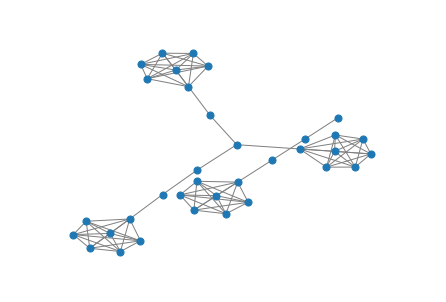

In [27]:
allGraphs = nx.compose_all([complete, barbell, lollipop])
allGraphs.add_edge(get_random_node(lollipop), get_random_node(lollipop))
allGraphs.add_edge(get_random_node(complete), get_random_node(barbell))
draw_graph(allGraphs, layout=nx.kamada_kawai_layout)

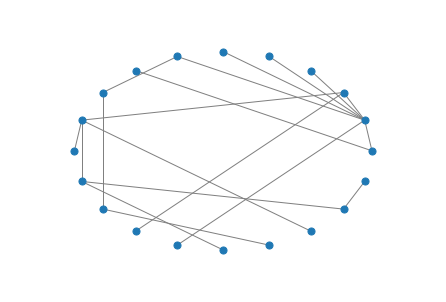

In [28]:
BA_graph_small = nx.extended_barabasi_albert_graph(n=20,m=1,p=0,q=0)
draw_graph(BA_graph_small, layout=nx.circular_layout)

In [29]:
graph = nx.florentine_families_graph()

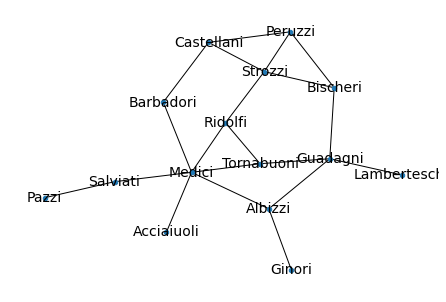

In [30]:
nx.draw_kamada_kawai(graph, with_labels=True, node_size=20, font_size=14)
plt.savefig("Florentine.png")

# Graph Machine Learning using logistic regression 

In [31]:
#Logistic Regression

In [32]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


In [33]:
n = 50  # number of nodes
p = 0.2  # edge probability
features = np.random.randn(n, 10)  # node feature matrix
labels = np.random.randint(2, size=n)  # node labels (0 or 1)
adj_matrix = np.random.binomial(1, p, size=(n, n))  # adjacency matrix
np.fill_diagonal(adj_matrix, 0)  # remove self-loops
G = nx.from_numpy_matrix(adj_matrix)  # create networkx graph
pos = nx.spring_layout(G)  # layout nodes


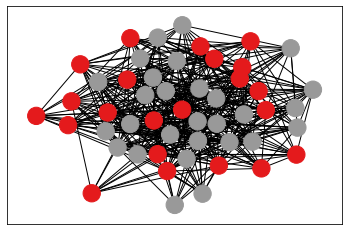

In [34]:
plt.figure()
nx.draw_networkx_nodes(G, pos, node_color=labels, cmap=plt.cm.Set1)
nx.draw_networkx_edges(G, pos)
plt.show()

In [35]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2)
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [36]:
y_pred = model.predict(X_test)
acc = np.mean(y_pred == y_test)
print(f"Accuracy: {acc:.2f}")

Accuracy: 0.90


# GCN Model For CORA graph structured dataset

In [48]:
import torch
import torch.nn.functional as F
from torch_geometric.datasets import Planetoid
from torch_geometric.nn import GCNConv

# Load the dataset
dataset = Planetoid(root='data/Cora', name='Cora')

# Define the model
class GCN(torch.nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels):
        super(GCN, self).__init__()
        self.conv1 = GCNConv(in_channels, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, out_channels)

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, training=self.training)
        x = self.conv2(x, edge_index)
        return F.log_softmax(x, dim=1)

# Initialize the model
model = GCN(dataset.num_features, 16, dataset.num_classes)

# Define the device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Move the model and data to the device
model = model.to(device)
data = dataset[0].to(device)

# Define the optimizer and the loss function
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
criterion = torch.nn.NLLLoss()

# Define the training function
def train(model, optimizer, data):
    model.train()
    optimizer.zero_grad()
    out = model(data.x, data.edge_index)
    loss = criterion(out[data.train_mask], data.y[data.train_mask])
    loss.backward()
    optimizer.step()
    return loss.item()

# Define the evaluation function
def evaluate(model, data):
    model.eval()
    out = model(data.x, data.edge_index)
    pred = out.argmax(dim=1)
    acc = pred[data.test_mask].eq(data.y[data.test_mask]).sum().item() / data.test_mask.sum().item()
    return acc

# Train the model
for epoch in range(150):
    loss = train(model, optimizer, data)
    acc = evaluate(model, data)
    print(f'Epoch: {epoch + 1}, Loss: {loss:.4f}, Accuracy: {acc:.4f}')


Epoch: 1, Loss: 1.9423, Accuracy: 0.3450
Epoch: 2, Loss: 1.8509, Accuracy: 0.4360
Epoch: 3, Loss: 1.7579, Accuracy: 0.5180
Epoch: 4, Loss: 1.6474, Accuracy: 0.6410
Epoch: 5, Loss: 1.4803, Accuracy: 0.7170
Epoch: 6, Loss: 1.4006, Accuracy: 0.7410
Epoch: 7, Loss: 1.2878, Accuracy: 0.7570
Epoch: 8, Loss: 1.1399, Accuracy: 0.7670
Epoch: 9, Loss: 1.0036, Accuracy: 0.7690
Epoch: 10, Loss: 0.9265, Accuracy: 0.7770
Epoch: 11, Loss: 0.8561, Accuracy: 0.7800
Epoch: 12, Loss: 0.7573, Accuracy: 0.7760
Epoch: 13, Loss: 0.7141, Accuracy: 0.7840
Epoch: 14, Loss: 0.6136, Accuracy: 0.7950
Epoch: 15, Loss: 0.5363, Accuracy: 0.7940
Epoch: 16, Loss: 0.4909, Accuracy: 0.8000
Epoch: 17, Loss: 0.4232, Accuracy: 0.8000
Epoch: 18, Loss: 0.3582, Accuracy: 0.8050
Epoch: 19, Loss: 0.3266, Accuracy: 0.8070
Epoch: 20, Loss: 0.2923, Accuracy: 0.8080
Epoch: 21, Loss: 0.3000, Accuracy: 0.8060
Epoch: 22, Loss: 0.2315, Accuracy: 0.8040
Epoch: 23, Loss: 0.2222, Accuracy: 0.8040
Epoch: 24, Loss: 0.1676, Accuracy: 0.8070
E

In [ ]:
#the GCN model trains wiht minimum of loss to max of 5% and the accuracy steadying after 100 with 79% 